# Assignment: Detecting Outliers
---
## Retrieve connection strings, passwords, or secrets from JSON file
---

In [1]:
import json

# Demonstration of how to load a file that contains secrets without accidentally leaking those secrets
with open('/Users/ariadnear/Documents/aris-secrets.json') as f:
    data = json.load(f)

    # If you want your data to be secure, don't print this variable out!
    # Jupyter will retain a cached version of any printed data and it can be
    # accidentally committed to version control.
    secret_key = data["mongodb"]

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 66 characters in length.


---
## Conect to a MongoDB Server
---

In [2]:
import pymongo
import certifi

# Once you have retrieved your connection string from a secrets file, use it here
mongo_connection_string = data['mongodb']

# Connect to the database using known good certificates
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['imdb', 'MetacriticMovie', 'IMDB_Pipeline_View']


---
## Fetch a collection from a MongoDB Server
---

In [3]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["imdb"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6545770bb3a97e2eaf71b8fc,77631,Grease,110.0,7.2,265183,TV-14::(D),6/13/1978,6000000.0,60759.0,394955690.0,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,6545770bb3a97e2eaf71b8fd,78346,Superman,143.0,7.4,172769,TV-PG::(LV),12/10/1978,55000000.0,7465343.0,166200000.0,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,6545770bb3a97e2eaf71b8fe,77416,The Deer Hunter,183.0,8.1,334827,R,12/8/1978,15000000.0,NaN,NaN,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,6545770bb3a97e2eaf71b8ff,77651,Halloween,91.0,7.7,267109,TV-14,10/25/1978,300000.0,NaN,70000000.0,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,6545770bb3a97e2eaf71b900,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000.0,201747.0,3371006.0,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


---
## Query a subset of data from a MongoDB Server
---

In [4]:
import pandas as pd
import re

# Define your query in MongoDB Compass, on the website, or using any other available MongoDB program
query = {'release_date': re.compile(r"2015")}

# Execute this query and produce a cursor
cursor = da320_database["imdb"].find(query)

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,65457715b3a97e2eaf720b8d,369610,Jurassic World,124,6.9,628966,TV-14::(LV),5/29/2015,150000000.0,208806270.0,1.648855e+09,"Action, Adventure, Sci-Fi","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,"Patrick Crowley, Frank Marshall, Christopher R...","Universal Pictures, Amblin Entertainment, Lege..."
1,65457715b3a97e2eaf720b8e,2322441,Fifty Shades of Grey,125,4.1,316433,TV-14::(DLS),2/9/2015,40000000.0,94395000.0,5.710061e+08,"Drama, Romance, Thriller","Dakota Johnson, Jamie Dornan, Jennifer Ehle, E...",Sam Taylor-Johnson,"Jeb Brody, Dana Brunetti, Michael De Luca, E.L...","Focus Features, Michael De Luca Productions, T..."
2,65457715b3a97e2eaf720b8f,2379713,Spectre,148,6.8,433880,PG-13,10/26/2015,245000000.0,NaN,8.806742e+08,"Action, Adventure, Thriller","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes,"Zakaria Alaoui, Barbara Broccoli, Daniel Craig...","B24, Columbia Pictures, Danjaq, Eon Production..."
3,65457715b3a97e2eaf720b90,3569230,Legend,132,6.9,177006,"TV-14::(DLSV, TV Rating.)",9/3/2015,30000000.0,NaN,4.297299e+07,"Biography, Crime, Drama, Thriller","Paul Anderson, Tom Hardy, Christopher Ecclesto...",Brian Helgeland,"Michael Bassick, Tim Bevan, Liza Chasin, Chris...","Cross Creek Pictures, Working Title Films, Ant..."
4,65457715b3a97e2eaf720b92,2381249,Mission: Impossible - Rogue Nation,131,7.4,366873,PG-13,7/23/2015,150000000.0,55520089.0,7.008684e+08,"Action, Adventure, Thriller","Tom Cruise, Jeremy Renner, Simon Pegg, Rebecca...",Christopher McQuarrie,"J.J. Abrams, Zakaria Alaoui, Bryan Burk, Tom C...","Paramount Pictures, Skydance Media, Bad Robot,..."


---
## Convert data using Pandas
---

In [5]:
# Transform and standarize the columns
imdb.release_date = pd.to_datetime(imdb.release_date, errors='coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime = pd.to_numeric(imdb.runtime, errors='coerce')

---
## Plotting Results
---

#### Scatterplot

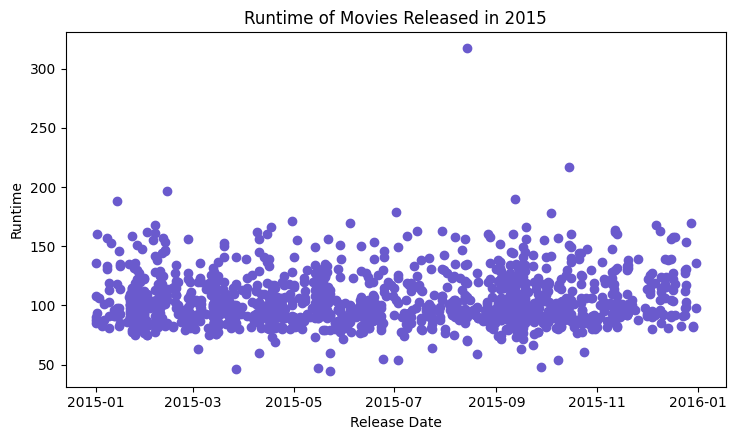

In [6]:
from matplotlib import pyplot
# Set the figure size
pyplot.rcParams["figure.figsize"] = [7.50, 4.50]
pyplot.rcParams["figure.autolayout"] = True
# Plot runtime by release date
pyplot.title('Runtime of Movies Released in 2015')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime')
pyplot.scatter(imdb['release_date'], imdb['runtime'], color='slateblue')
pyplot.show()

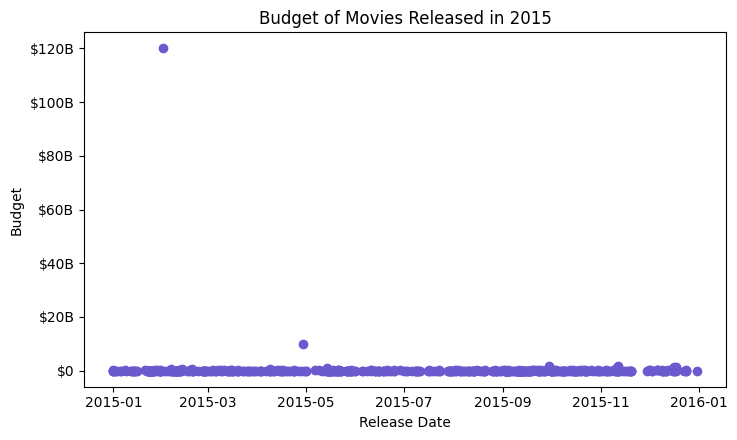

In [7]:
# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"
# Plot budget by release date
pyplot.title('Budget of Movies Released in 2015')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(imdb['release_date'], imdb['budget'], color='slateblue')
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()

#### Histogram

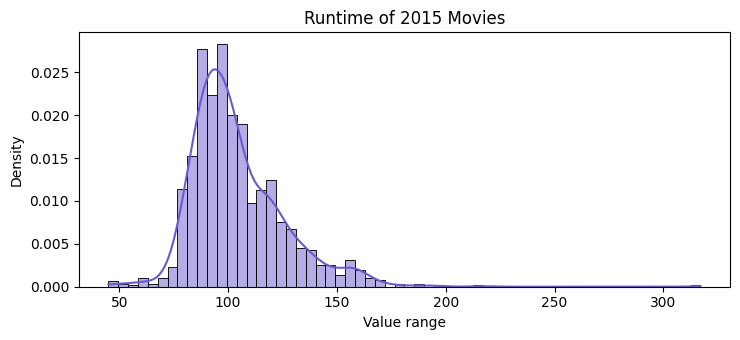

In [8]:
# Plotting a Histogram
import seaborn as sns
# Set the figure size
pyplot.rcParams["figure.figsize"] = [7.50, 3.50]
pyplot.rcParams["figure.autolayout"] = True
# Plot runtimes in a distribution histogram
pyplot.title('Runtime of 2015 Movies')
pyplot.xlabel('Value range')
# plotting histogram and density 
sns.histplot(imdb['runtime'], kde=True, stat="density", color='slateblue')
pyplot.show()

#### Boxplot

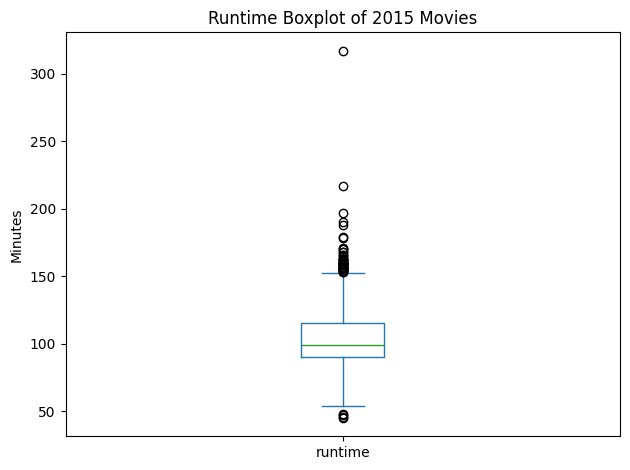

In [9]:
# Set the figure size
pyplot.rcParams["figure.figsize"] = [6.4, 4.8]
pyplot.rcParams["figure.autolayout"] = True
# Runtime Boxplot
pyplot.ylabel('Minutes')
pyplot.title('Runtime Boxplot of 2015 Movies')
ax = imdb['runtime'].plot(kind='box')

pyplot.show()

In [10]:
import numpy as np
# Find the rows that contain outliers above 195 min runtime.
print(np.where(imdb['runtime']>195))

(array([355, 539, 777]),)


In [11]:
# Print the title, runtime ,release date and budget of outliers above 195 min runtime.
print(imdb.iloc[[355,539,777], [2,3,7,8]])

                         title  runtime release_date       budget
355                 Happy Hour      317   2015-08-14          NaN
539                     Hamlet      217   2015-10-15          NaN
777  MSG: The Messenger of God      197   2015-02-13  550000000.0


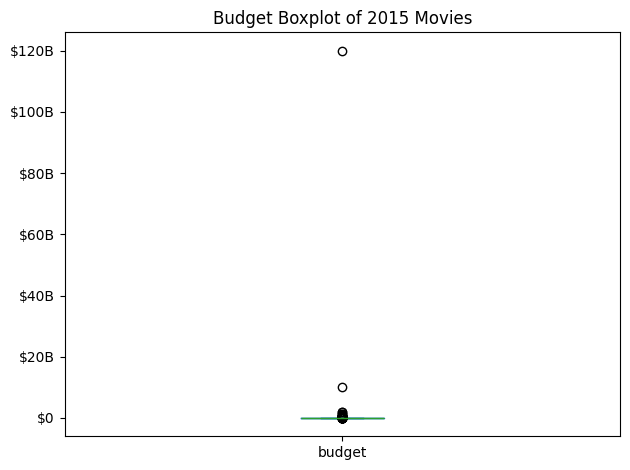

In [12]:
# Budget Boxplot
pyplot.title('Budget Boxplot of 2015 Movies')
ax = imdb['budget'].plot(kind='box')
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()

In [13]:
# Find the rows that contain outliers above $20 billion budget.
print(np.where(imdb['budget']>2000000000))

(array([419, 457]),)


In [14]:
# Print the title, runtime ,release date and budget of outliers above $20 billion budget.
print(imdb.iloc[[419,457], [2,3,7,8]])

                              title  runtime release_date        budget
419  Muhammad: The Messenger of God      162   2015-02-01  1.200000e+11
457                Coin Locker Girl      110   2015-04-29  1.000000e+10


---
## Analysis of Outliers
---

##### Runtime
The top three 2015 movies with a running time above 195 minutes are Happy Hour, Hamlet, and MSG: The messenger of God. Happy Hour is a Japanese drama film that even for Japanese cinema is considered a long film with a runtime of 317 minutes. On Rotten Tomatoes, the film holds an approval rating of 100% based on 14 reviews, with a weighted average of 8.5/10. The second movie Hamlet has a runtime of 217 minutes. The original tragedy was written by Shakespeare and it's his longest play. The third movie, MSG: The messenger of God has a runtime of 197 minutes. This movie is an Indian faith-based film that has received largely negative reviews from critics. In general, a longer runtime is not related to success. We see that Happy Hour was succesful but MSG was not. I think, a longer runtime has to do with the story being told. Also, it would be interesting to check if non-American films tend to have longer running time.

##### Budget
The outliers of budget are interesting. The top two 2015 movies with the largest budget are Muhammad: The Messenger of God, and Coin Locker Girl. Both films are from non-American movies. The first one is an Iranian film and the second one a South Korean film. I am guessing the budget from these two movies wasn't converted to dollars because according to Wikipedia the budget of Muhammad: The Messenger of God was $40 million. Probably, many of the movies from imdb have the same issue with the budget.
